In [1]:
import pandas as pd


In [2]:
mouse_metadata_path = r'C:\Users\User\Desktop\Starter_Code (5)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv'
study_results_path = r'C:\Users\User\Desktop\Starter_Code (5)\Starter_Code\Pymaceuticals\data\Study_results.csv'


In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [4]:
unique_mice_metadata = mouse_metadata['Mouse ID'].nunique()
unique_mice_study_results = study_results['Mouse ID'].nunique()

print(f'Number of unique mice IDs in mouse metadata: {unique_mice_metadata}')
print(f'Number of unique mice IDs in study results: {unique_mice_study_results}')


Number of unique mice IDs in mouse metadata: 249
Number of unique mice IDs in study results: 249


In [5]:
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')


In [11]:
duplicate_time_points = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_time_points['Mouse ID'].unique()

print(f'Number of mouse IDs with duplicate time points: {len(duplicate_mouse_ids)}')



Number of mouse IDs with duplicate time points: 1


In [7]:
cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [8]:
updated_unique_mice = cleaned_data['Mouse ID'].nunique()
print(f'Updated number of unique mice IDs: {updated_unique_mice}')


In [12]:
cleaned_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
summary_stats = cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats.index.name = 'Drug Regimen'
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
import matplotlib.pyplot as plt 

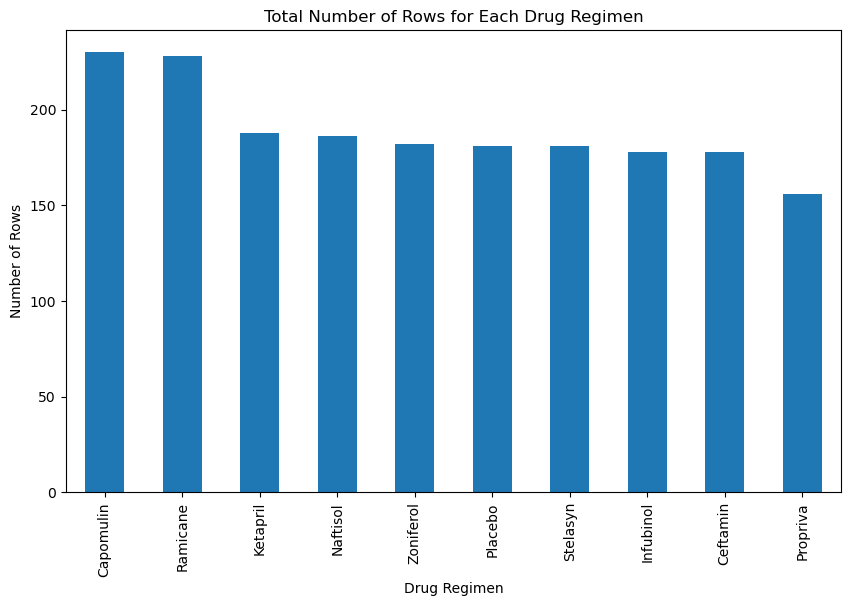

In [17]:
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', figsize=(10, 6), title='Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()


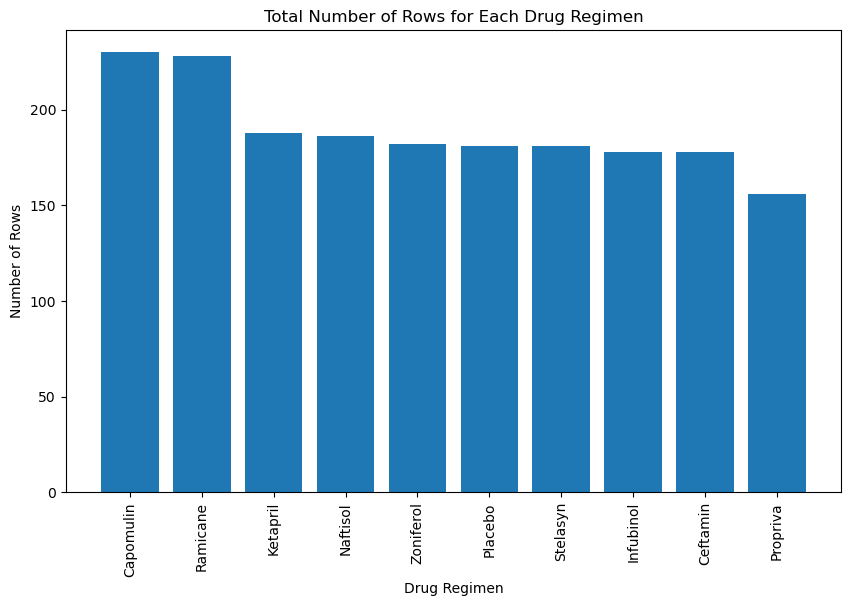

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()


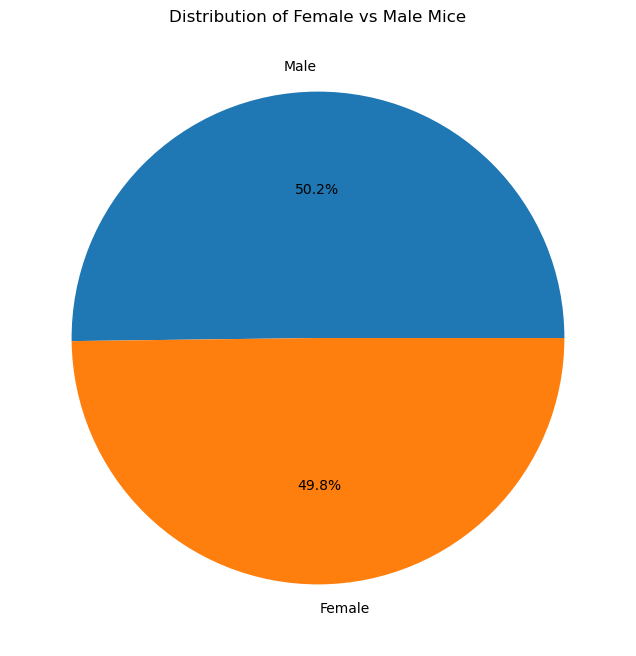

In [19]:
gender_counts = mouse_metadata['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Female vs Male Mice')
plt.ylabel('')
plt.show()


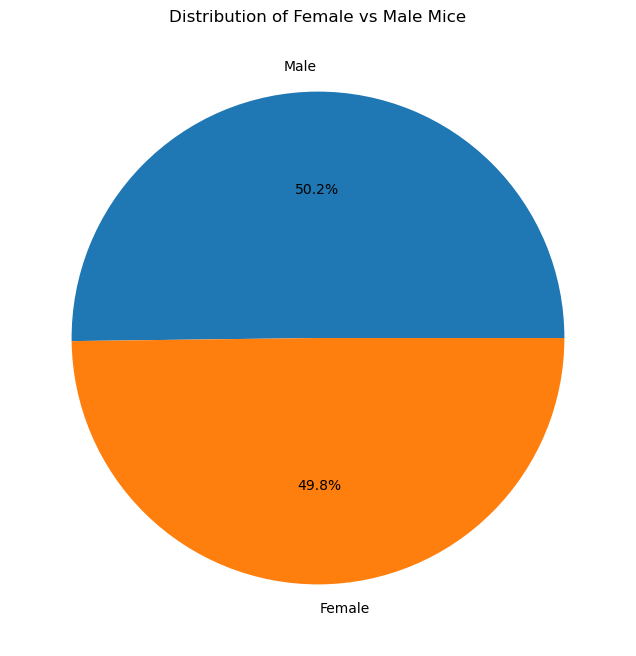

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()


In [21]:
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')


In [22]:
max_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoint_data = pd.merge(max_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')


In [23]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []


In [24]:
for treatment in treatments:
    final_tumor_volume = max_timepoint_data.loc[max_timepoint_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)
    
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq, upperq = quartiles[0.25], quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


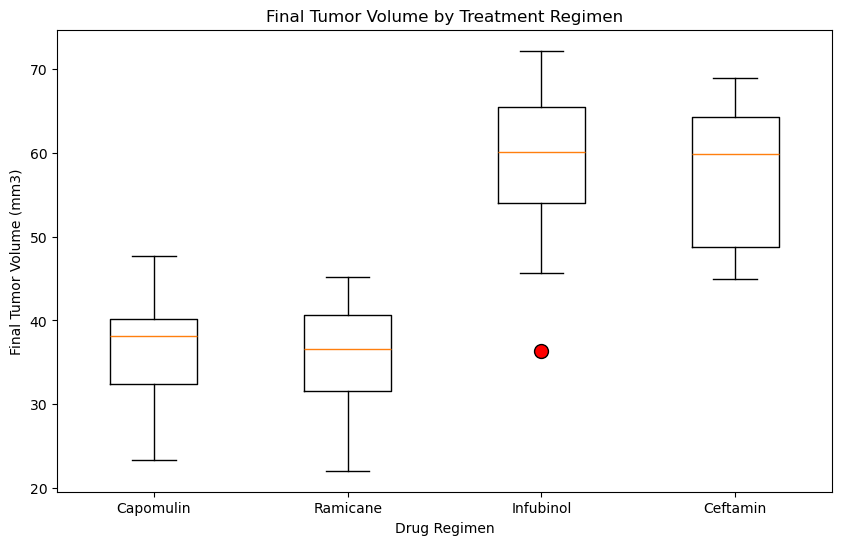

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=10))
plt.title('Final Tumor Volume by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


In [26]:
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']


In [27]:
single_mouse = capomulin_data[capomulin_data['Mouse ID'] == 's185']


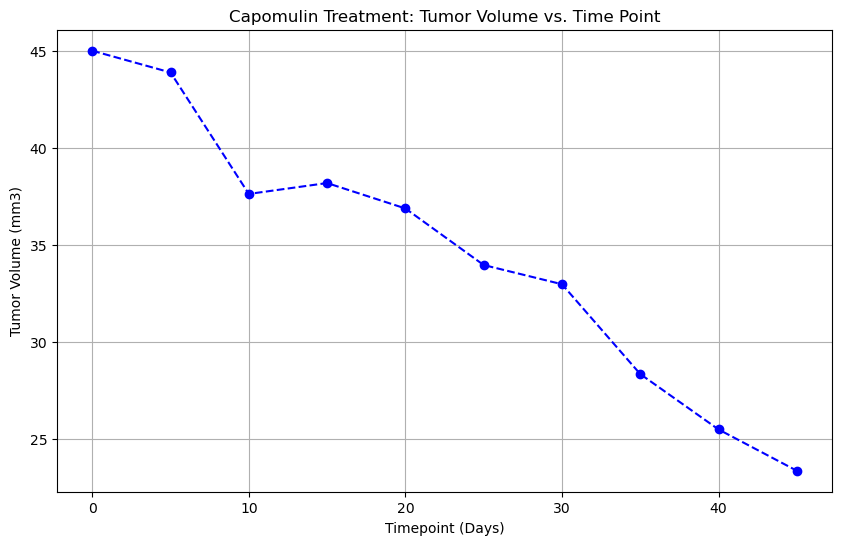

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], marker='o', color='b', linestyle='--')
plt.title('Capomulin Treatment: Tumor Volume vs. Time Point')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()



In [29]:
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()


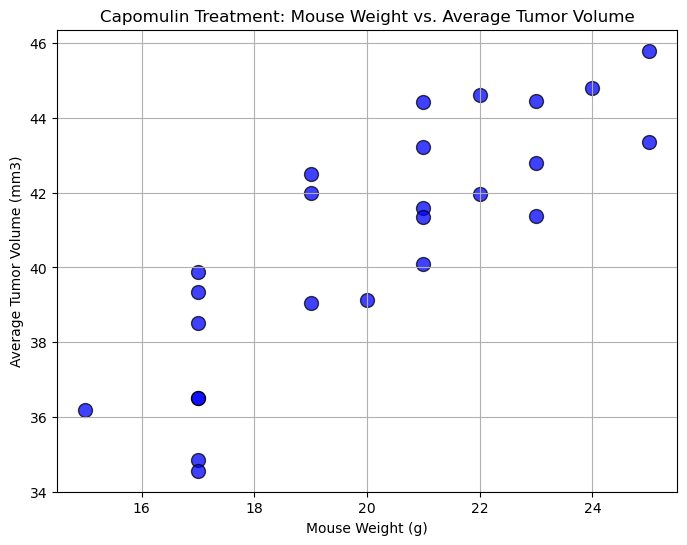

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=100, alpha=0.75)
plt.title('Capomulin Treatment: Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


In [36]:
from scipy.stats import linregress

In [37]:
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

In [38]:
correlation_coefficient = mouse_weight.corr(average_tumor_volume)

In [39]:
print(f"Correlation Coefficient between Mouse Weight and Average Tumor Volume: {correlation_coefficient}")

Correlation Coefficient between Mouse Weight and Average Tumor Volume: 0.8419363424694722


In [40]:
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)


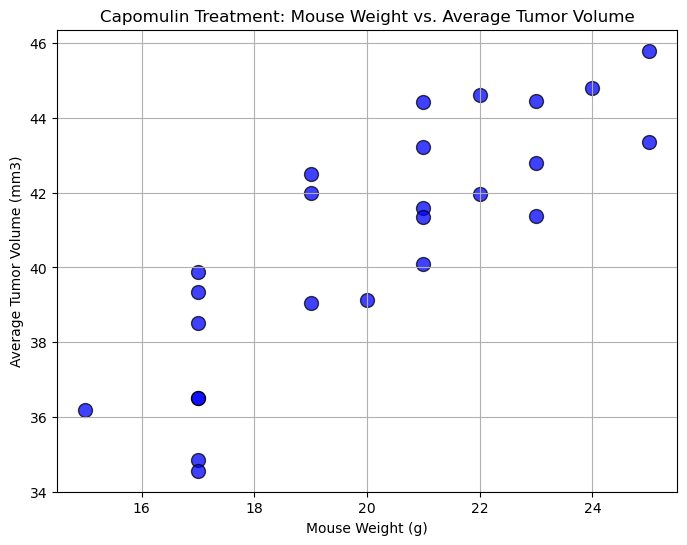

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=100, alpha=0.75)
plt.title('Capomulin Treatment: Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

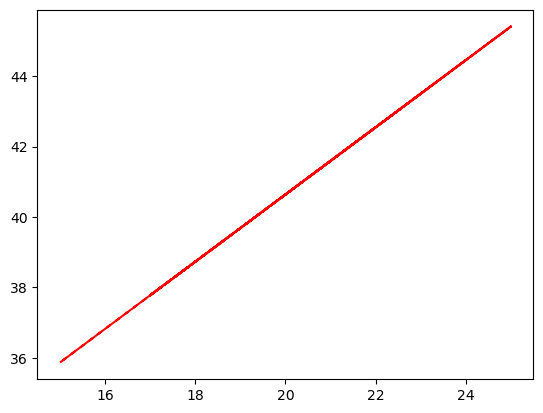

In [43]:
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', linestyle='--')

plt.show()